# LBP (Local Binary Pattern)影像處理範例

<img src="https://media.springernature.com/full/springer-static/image/art%3A10.1186%2F1687-6180-2014-182/MediaObjects/13634_2014_Article_725_Fig2_HTML.jpg" width=640></img><br>


In [ ]:
#載入套件
import numpy as np
import cv2 as cv

from matplotlib import pyplot as plt

In [15]:
#讀取圖片
img = cv.imread('./img/lena.png')

In [16]:
#自訂一個秀圖片的函數
def showImage(image):
    '''
    在jupyter中使用matplotlib直接顯示圖片在記事本中
    '''
    # OpenCV的彩色影像 需轉成RGB順序
    if len(image.shape) == 3 and image.shape[2] == 3:
        image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
        plt.imshow(image)
    # OpenCV的灰階影像 需要特別調整 plt.imshow 的參數
    if len(image.shape) == 2:
        plt.imshow(image, cmap=plt.cm.gray, vmin=0, vmax=255)
    #plt.show()

(400, 400, 3)


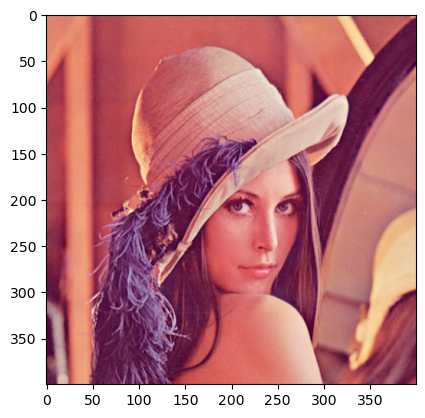

In [17]:
showImage(img)
print(img.shape)

In [18]:
gray_img = cv.cvtColor(img, cv.COLOR_BGR2GRAY) # 將影像轉為灰階

In [19]:
#定義LBP演算法的函數
def lbp(img):
    assert(len(img.shape) == 2) # LBP只接受灰階影像
    ret = np.zeros_like(img)
    
    # 將圖片擴大，為了可以處理邊界
    img = cv.copyMakeBorder(img, 1, 1, 1, 1, cv.BORDER_REPLICATE)
    
    for y in range(1, img.shape[0] - 1):
        for x in range(1, img.shape[1] - 1):
            center = img[y][x]
            pixel = 0
            pixel |= (img[y - 1][x - 1] >= center) << 0
            pixel |= (img[y - 1][x + 0] >= center) << 1
            pixel |= (img[y - 1][x + 1] >= center) << 2
            pixel |= (img[y + 0][x + 1] >= center) << 3
            pixel |= (img[y + 1][x + 1] >= center) << 4
            pixel |= (img[y + 1][x + 0] >= center) << 5
            pixel |= (img[y + 1][x - 1] >= center) << 6
            pixel |= (img[y + 0][x - 1] >= center) << 7
            
            ret[y-1][x-1] = pixel
    return ret

(400, 400)


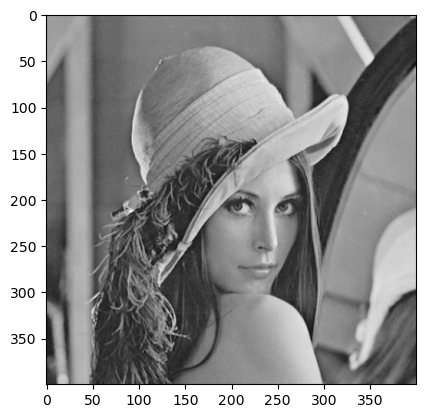

In [20]:
showImage(gray_img)
print(gray_img.shape)

In [21]:
lbp_img = lbp(gray_img)

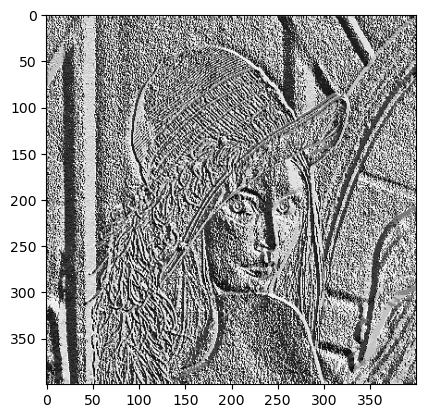

In [22]:
showImage(lbp_img)

## 計算直方圖

`calcHist(images, channels, mask, histSize, ranges)`

- images: 影像陣列
- channels: 需處理的通道數編號
- mask: 遮罩，遮掉的部分不會列入計算直方圖
- histSize: 各個通道的bin數量
- ranges: 列入計算的數值範圍

In [23]:
#計算直方圖
# histSize = 256 分成256份
# ranges = [0, 256] 將0~255的灰階值平均分到256個bin中
hist = cv.calcHist([lbp_img], [0], None, [256], [0, 256])

Text(0.5, 1.0, 'histogram of image')

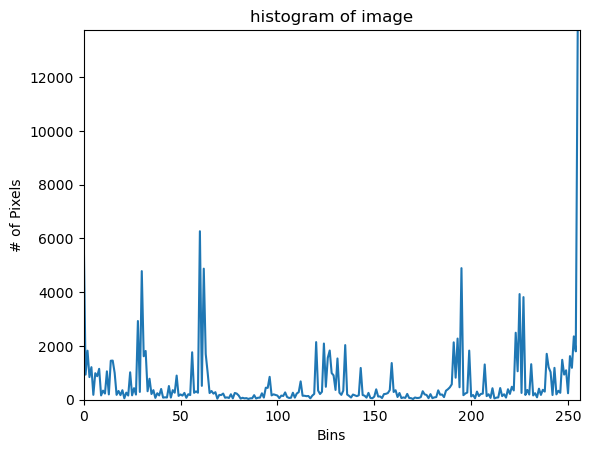

In [24]:
#畫出直方圖
plt.plot(hist)

plt.xlim([0, len(hist)])
plt.ylim([0, max(hist)])
plt.xlabel('Bins')
plt.ylabel('# of Pixels')
plt.title("histogram of image")

## 換人臉圖片再試一次

In [25]:
import cv2 as cv
from matplotlib import pyplot as plt
def plot_all(all_image, count):    
    for i in range(1,count+1):
        plt.subplot(1, count, i), showImage(all_image[i-1])
    plt.show()

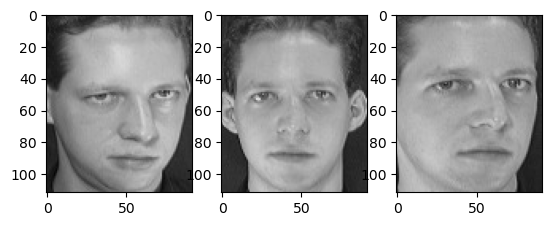

In [26]:
#批次讀取圖片
pic_number = 3 #讀取圖片的張數
All_image = []
for i in range(pic_number):
    image = cv.imread('./img/%d.jpg'%(i)) #讀取檔案中前幾張圖
    All_image.insert(i, image)
    
plot_all(All_image, pic_number)

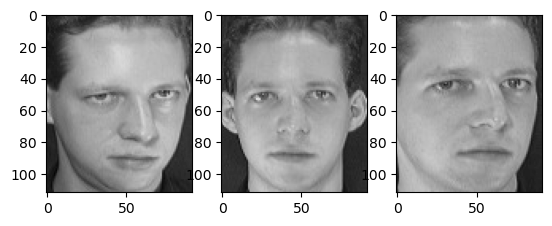

In [27]:
#灰階
All_image_gray = []
for i in range(pic_number):
    grayImage = cv.cvtColor(All_image[i], cv.COLOR_BGR2GRAY) # 將影像轉為灰階
    All_image_gray.insert(i, grayImage)
    
plot_all(All_image_gray, pic_number)

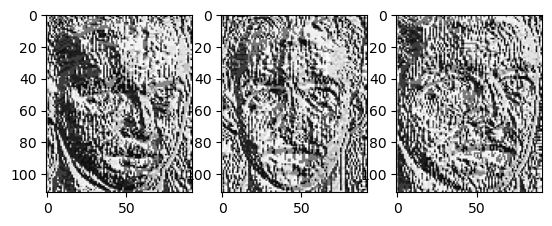

In [28]:
#LBP
All_image_lbp = []
for i in range(pic_number):
    lbpImage = lbp(All_image_gray[i])
    All_image_lbp.insert(i, lbpImage)
    #cv.imwrite('./assets/face_lbp/otherlbp_%d.jpg'%(i), lbpImage) #需先在 assets中創立一個 face_lbp 資料夾

plot_all(All_image_lbp, pic_number)

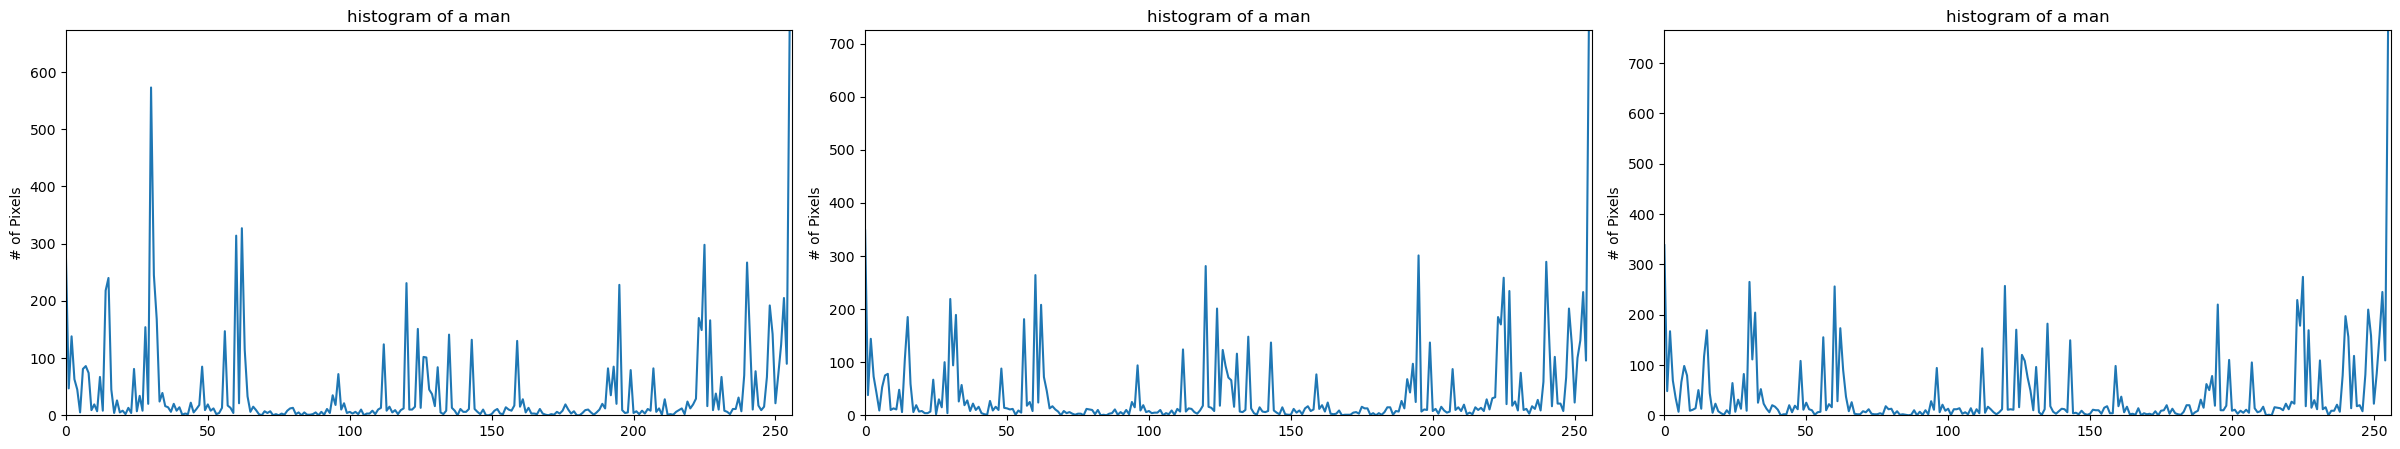

In [29]:
#直方圖
fig , ax = plt.subplots(figsize=(30, 5))
fig.subplots_adjust(hspace=0.1, wspace=0.1) #設定子圖的間隔
for i in range(pic_number):
    hist = cv.calcHist([All_image_lbp[i]], [0], None, [256], [0, 256])
    plt.subplot(1, pic_number, i+1), plt.plot(hist)
    
    plt.xlim([0, len(hist)])
    plt.ylim([0, max(hist)])
    plt.ylabel('# of Pixels')
    plt.title("histogram of a man")